$MSFT: possibly delisted; no price data found  (1d 2001-01-13 00:00:00 -> 2001-01-16 00:00:00)
$MSFT: possibly delisted; no price data found  (1d 2004-01-17 00:00:00 -> 2004-01-20 00:00:00)
$MSFT: possibly delisted; no price data found  (1d 2008-01-19 00:00:00 -> 2008-01-22 00:00:00)
$MSFT: possibly delisted; no price data found  (1d 2009-01-17 00:00:00 -> 2009-01-20 00:00:00)
$MSFT: possibly delisted; no price data found  (1d 2012-01-14 00:00:00 -> 2012-01-17 00:00:00)
$MSFT: possibly delisted; no price data found  (1d 2013-01-19 00:00:00 -> 2013-01-22 00:00:00)
$MSFT: possibly delisted; no price data found  (1d 2014-01-18 00:00:00 -> 2014-01-21 00:00:00)
$MSFT: possibly delisted; no price data found  (1d 2019-04-19 00:00:00 -> 2019-04-22 00:00:00)


Coefficient : 0.25937960561750967


(<seaborn.axisgrid.FacetGrid at 0x1097b1df0>, None)

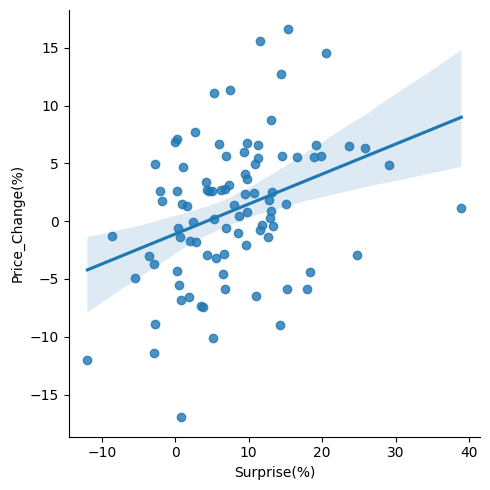

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import yfinance as yf

def EarningsReportRelation(TCKR):
    ticker = yf.Ticker(TCKR)
    earnings = ticker.get_earnings_dates(limit=10000)
    earnings


    len(earnings)
    earnings = earnings[earnings["Event Type"] != "Meeting"]
    earnings
    earnings = earnings.drop(columns=["Event Type"])
    earnings
    earningsdate = earnings.index.date
    earningsdate = np.array(earningsdate, dtype=str)

    earnings = earnings.reset_index()
    earnings = earnings.rename(columns={"index": "Earnings Date"})
    earnings = earnings.drop(columns=["Earnings Date"])
    earnings["Earnings Date"] = earningsdate
    earnings
    earnings = earnings[::-1]
    earnings
    earnings.reset_index()
    earnings
    earnings.index
    earnings = earnings.reset_index(drop=False)
    earnings = earnings.set_index("Earnings Date")
    earnings
    earnings = earnings.drop(columns=['index'])
    df = earnings
    df
    df["Price_Open"] = 0
    df["Price_Close"] = 0
    df
    df.index = pd.to_datetime(df.index)
    open = []
    close = []
    bf5 =[]
    af5 = []
    for date in earnings.index : 
        pricedf = ticker.history(start=date, end=date + pd.Timedelta(days=3))
        open.append(pricedf["Open"].iloc[0] if not pricedf.empty else None)
        close.append(pricedf["Close"].iloc[0] if not pricedf.empty else None)

        af = date + pd.Timedelta(days=5)
        pricedf = ticker.history(start=af, end=af + pd.Timedelta(days=3))
        af5.append(pricedf["Close"].iloc[0] if not pricedf.empty else None)

        bf = date - pd.Timedelta(days=5)
        pricedf = ticker.history(start=bf, end=bf + pd.Timedelta(days=3))
        bf5.append(pricedf["Close"].iloc[0] if not pricedf.empty else None)
    a = np.array(close)
    a.size
    df["Price_Open"] = open
    df["Price_Close"] = close
    df["Price_5Days_After"] = af5
    df["Price_5Days_Before"] = bf5
    df1 = df
    df1

    df1["Price_Change(%)"] = ((df1["Price_5Days_After"] - df1["Price_5Days_Before"]) / df1["Price_5Days_Before"])*100
    df1.drop(columns=["EPS Estimate","Reported EPS"])
    df1 = df1.dropna()

    def EarningsGraph():
        X = df1[['Surprise(%)']]
        Y = df1['Price_Change(%)']
        model = LinearRegression()
        model.fit(X, Y)
        slope = str(model.coef_[0])
        return sns.lmplot(data=df1, x="Surprise(%)", y="Price_Change(%)"), print("Coefficient : " + slope)
    return EarningsGraph()

EarningsReportRelation(TCKR="MSFT")